# Student Performance Indicator

### Life cycle of Machine Learning Project :

* Understanding the Problem Statement
* Data Collection
* Data Checks to perform
* Exploratory data analysis
* Data Pre-Processing
* Model Training
* Choose best model

## 1) Problem Statement :
* This project understands how the student's performance (test scores) is affected by other variables such as Gender, Ethnicity, Parental level of education, Lunch and Test preparation course.

## 2) Data Collection :

* Dataset Source - https://www.kaggle.com/datasets/spscientist/students-performance-in-exams?datasetId=74977
* The data consists of 8 column and 1000 rows.

### 2.1 Import Data and Required Packages 

In [1]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

### Import the CSV Data as Pandas DataFrame

In [2]:
df=pd.read_csv('data/stud.csv')

### Show Top 5 records :

In [3]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


### Shape of the dataset

In [4]:
df.shape

(1000, 8)

### 2.2 Dataset Information

* gender : sex of students-> (Male/Female)
* race/eticity : ethnicity of students-> (Group A,B,C,D,E)
* parental level of education : parent's final education ->(bachelor's degree,some college,master's degree,associate's degree,high school)
* lunch : having lunch before test(standard or free/reduced)
* test preparation course: complete or not complete before test
* math score
* reading score
* writing score

## 3. Data Check to perform 

* Check Missing values
* Check Duplicates
* Check data type
* Check the number of unique values of each column
* Check statistics of data set
* Check various categories present in the different categorical column



In [5]:
# Check Missing values

df.isna().sum()

gender                         0
race_ethnicity                 0
parental_level_of_education    0
lunch                          0
test_preparation_course        0
math_score                     0
reading_score                  0
writing_score                  0
dtype: int64

In [6]:
# No missing values

#### Check for duplicates

In [7]:
df.duplicated().sum()

np.int64(0)

<b>There are no duplicate values in the dataset</b>

#### 3.3 Check Data type

In [8]:
# check null and Dtypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race_ethnicity               1000 non-null   object
 2   parental_level_of_education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test_preparation_course      1000 non-null   object
 5   math_score                   1000 non-null   int64 
 6   reading_score                1000 non-null   int64 
 7   writing_score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


#### 3.4 Checking the no. of unique values for each column

In [9]:
df.nunique()

gender                          2
race_ethnicity                  5
parental_level_of_education     6
lunch                           2
test_preparation_course         2
math_score                     81
reading_score                  72
writing_score                  77
dtype: int64

#### 3.5 Check statistics of data set

In [10]:
df.describe()

,math_score,reading_score,writing_score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


#### Insight :

* From above description of numerical data,all means are very close to each other-b/w 66 and 68.05
* All standard deviations are also close -b/w 14.6 and 15.19;
* While there is a minimum score 0 for math, for writing minumum is much higher =10 and for reading 17

#### 3.7 Explore Data:


In [11]:
print("Categories in gender variable",df['gender'].unique())
print("Categories in 'race/ethnicity' variable'",df['race_ethnicity'].unique())
print("Categories in 'parental level of education' variable ",df['parental_level_of_education'].unique())
print("Categories in 'lunch' variabe ",df['lunch'].unique())
print("Categories in 'test preparation course' variable ",df['test_preparation_course'].unique())

Categories in gender variable ['female' 'male']
Categories in 'race/ethnicity' variable' ['group B' 'group C' 'group A' 'group D' 'group E']
Categories in 'parental level of education' variable  ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
Categories in 'lunch' variabe  ['standard' 'free/reduced']
Categories in 'test preparation course' variable  ['none' 'completed']


In [12]:
# define numerical & categorical columns
numerical_features=[feature for feature in df.columns if df[feature].dtypes !='object']
categorical_features=[feature for feature in df.columns if df[feature].dtypes =='object']


# print columns
print('we have {} numerical features : {}'.format(len(numerical_features),numerical_features))
print('we have {} categorical features : {}'.format(len(categorical_features),categorical_features))

we have 3 numerical features : ['math_score', 'reading_score', 'writing_score']
we have 5 categorical features : ['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch', 'test_preparation_course']


In [13]:
columns=df.columns
print('we have {} columns : {}'.format(len(columns),columns))

we have 8 columns : Index(['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch',
       'test_preparation_course', 'math_score', 'reading_score',
       'writing_score'],
      dtype='object')


In [14]:
#### 3.8 Adding columns for "Total Score" and "Average"

df['total_score']=df['math_score']+df['reading_score']+df['writing_score']
df['average']=df['total_score']/3
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total_score,average
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


In [15]:
reading_full=df[df['reading_score']==100]['average'].count() # entries whose score is 100 find there respective average
writing_full=df[df['writing_score']==100]['average'].count()
math_full=df[df['math_score']==10]['average'].count()

print(f"Number of students with full marks in Maths: ",{math_full})
print(f"Number of students with full marks in Writing: ",{writing_full})
print(f"Number of students with full marks in Writing: ",{reading_full})



Number of students with full marks in Maths:  {np.int64(0)}
Number of students with full marks in Writing:  {np.int64(14)}
Number of students with full marks in Writing:  {np.int64(17)}


In [16]:
reading_less_20=df[df['reading_score']<=20]['average'].count() # entries whose score is 100 find there respective average
writing_less_20=df[df['writing_score']<=20]['average'].count()
math_less_20=df[df['math_score']<=20]['average'].count()

print(f"Number of students with full marks in Maths: ",{math_less_20})
print(f"Number of students with full marks in Writing: ",{writing_less_20})
print(f"Number of students with full marks in Writing: ",{reading_less_20})

Number of students with full marks in Maths:  {np.int64(4)}
Number of students with full marks in Writing:  {np.int64(3)}
Number of students with full marks in Writing:  {np.int64(1)}


#### Insights

* From above values we get students have performed by worst in Maths.
* Best performance is in reading section.

## 4. Exploring Data (visulaization)

##### 4.1 Visulaize average score distribution to make some conclusion.
* Histogram
* Kernel Distribution Function

<bold>4.1.1 Histogram & KDE</bold>

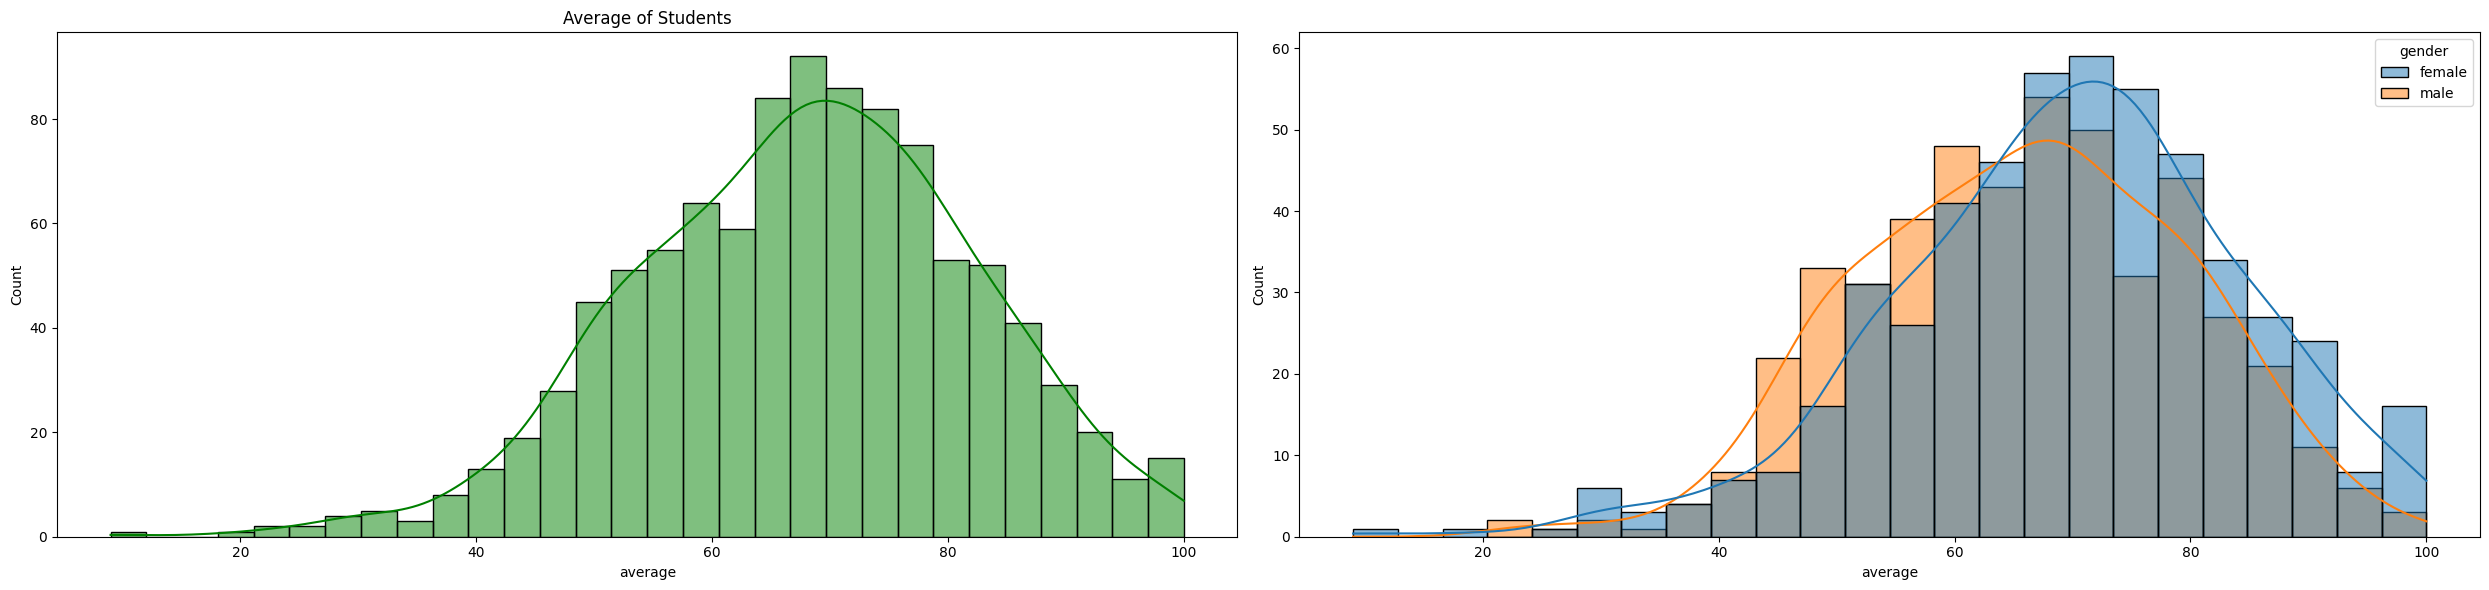

In [37]:
fig,axs=plt.subplots(1,2,figsize=(25,6))

sns.histplot(data=df,x='average',bins=30,kde=True,color='g',ax=axs[0])
axs[0].set_title('Average of Students')

sns.histplot(data=df,x='average',kde=True,hue='gender',ax=axs[1])
plt.tight_layout()
plt.show()

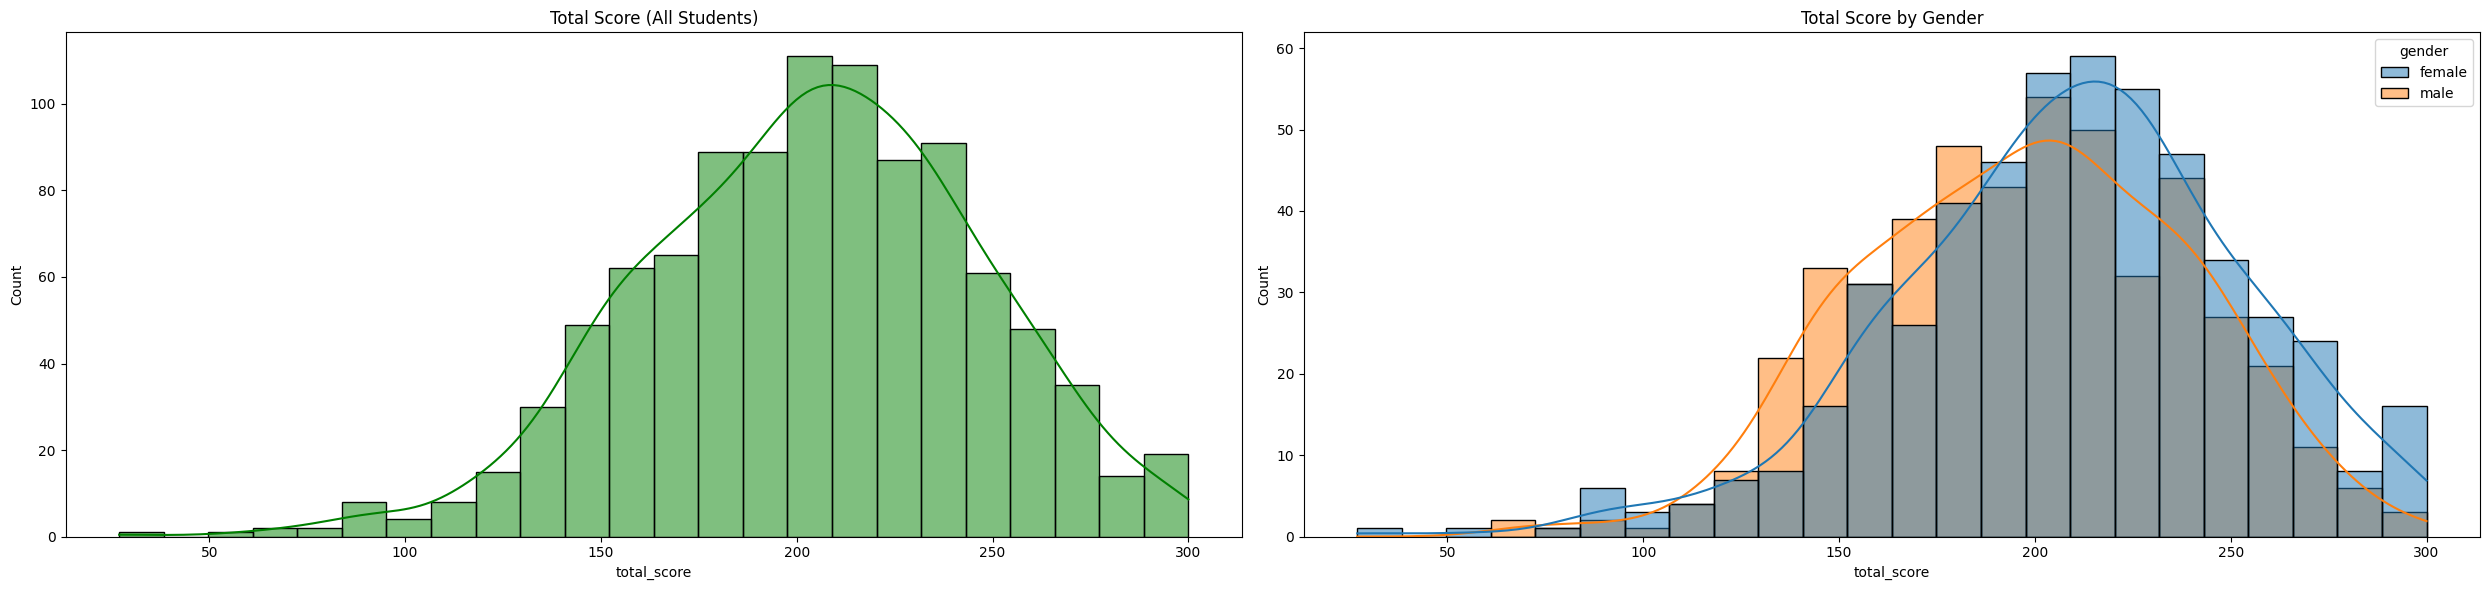

In [32]:
fig, axs = plt.subplots(1, 2, figsize=(25, 6))

# Use axs[0] for the first plot
sns.histplot(data=df, x='total_score', kde=True, color='g', ax=axs[0])
axs[0].set_title('Total Score (All Students)')

# Use axs[1] for the second plot
sns.histplot(data=df, x='total_score', kde=True, hue='gender', ax=axs[1])
axs[1].set_title('Total Score by Gender')

plt.tight_layout()
plt.show()


#### Insights

* Female students ten to perform well then male students

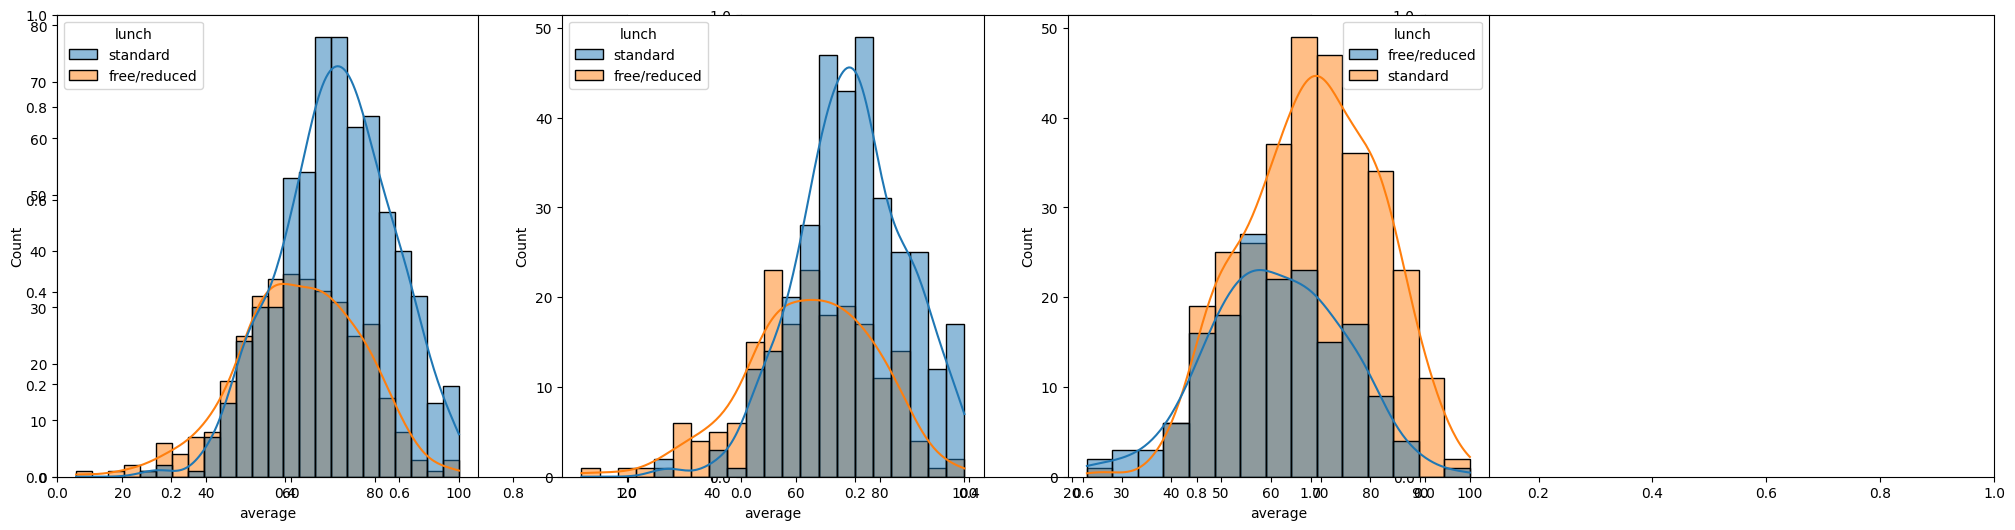

In [19]:
plt.subplots(1,3,figsize=(25,6))
plt.subplot(141)
sns.histplot(data=df,x='average',kde=True,hue='lunch')
plt.subplot(142)
sns.histplot(data=df[df.gender=='female'],x='average',kde=True,hue='lunch')
plt.subplot(143)
sns.histplot(data=df[df.gender=='male'],x='average',kde=True,hue='lunch')
plt.show()


#### Insight

* Standard lunch helps perfrom well in exams
* Standard lunch helps perform well in exams be it a male or a female.

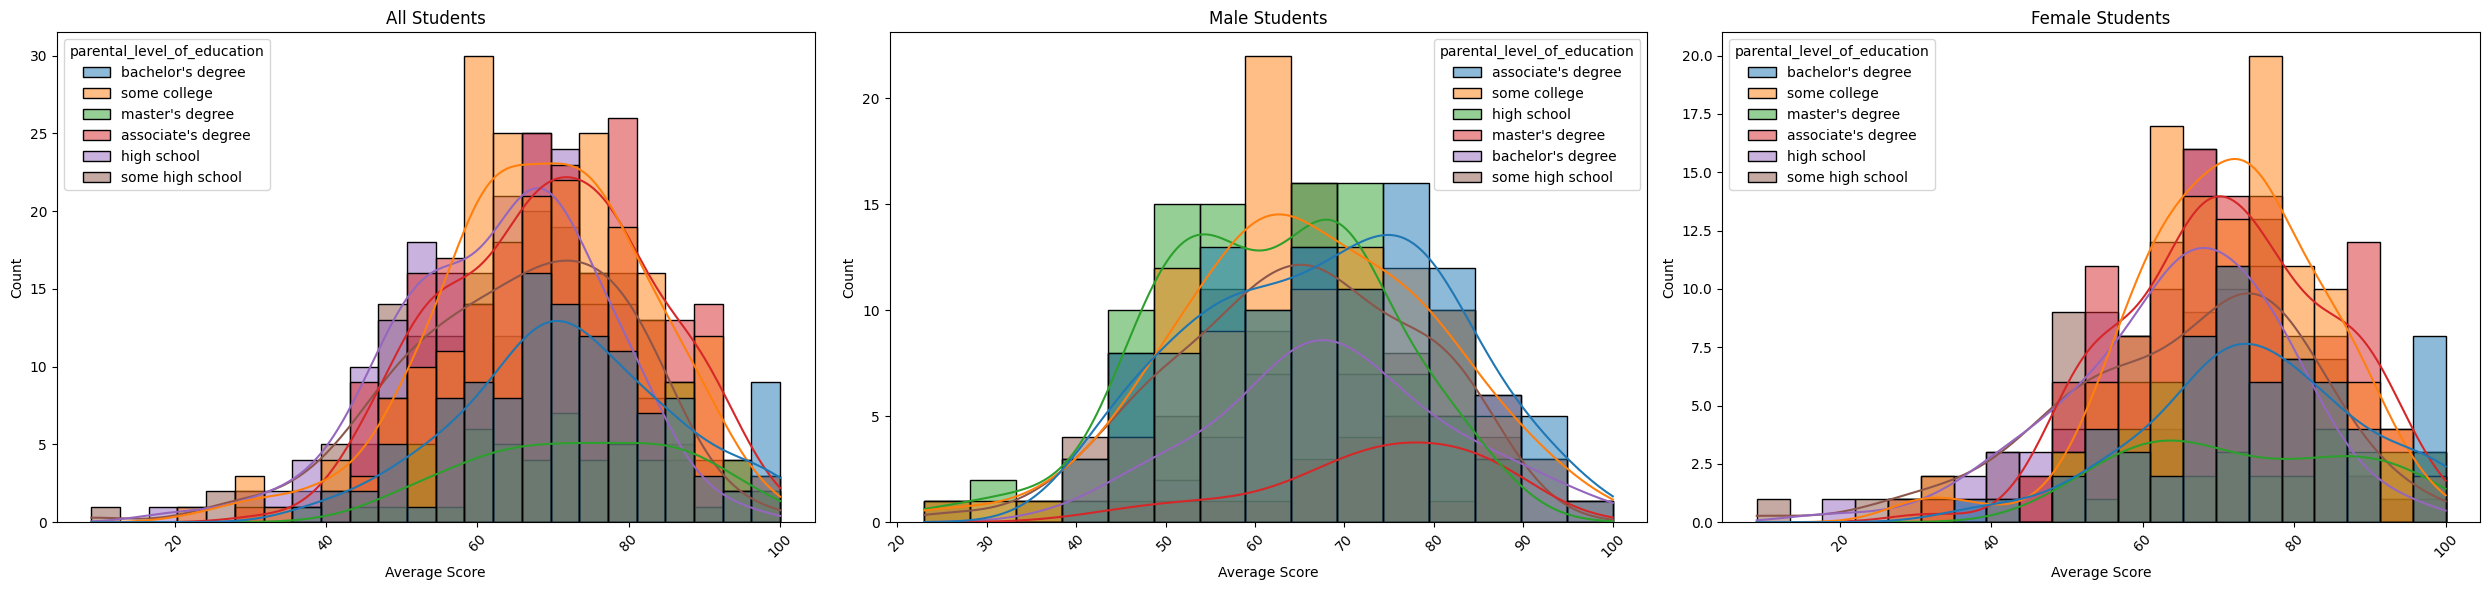

In [29]:

fig, axes = plt.subplots(1, 3, figsize=(25, 6))  # Create 1 row, 3 columns of subplots

# Plot 1: All students
sns.histplot(data=df, x='average', kde=True, hue='parental_level_of_education', ax=axes[0])
axes[0].set_title('All Students')
axes[0].set_xlabel('Average Score')
axes[0].tick_params(axis='x', rotation=45)

# Plot 2: Male students
sns.histplot(data=df[df.gender == 'male'], x='average', kde=True, hue='parental_level_of_education', ax=axes[1])
axes[1].set_title('Male Students')
axes[1].set_xlabel('Average Score')
axes[1].tick_params(axis='x', rotation=45)

# Plot 3: Female students
sns.histplot(data=df[df.gender == 'female'], x='average', kde=True, hue='parental_level_of_education', ax=axes[2])
axes[2].set_title('Female Students')
axes[2].set_xlabel('Average Score')
axes[2].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()


#### Insight 
* In general parent's education don't help student perform well in exam.
* 2nd plot show that parent's whose education is of associate's degree or master's their male children score higher.
* 3rd plot we can see there is no effect of parent's education on female students.

In [48]:
plt.subplots(1,3,figsize=(25,6))
axs=sns.histplot(data=df,x='average',kde=True,hue='race_ethnicity',ax=axs[0])
axs1=sns.histplot(data=df[df.gender=='female'],x='average',kde=True,hue='race_ethnicity',ax=axs1[1])
plt.show()

TypeError: 'Axes' object is not subscriptable